# Building an Interactive Graph with Matplotlib

---

This project is part of an assignment during the online course "Applied Plotting, Charting & Data Representation in Python" from the University of Michigan, through the Coursera platform. 

A bar chart with 95% confidence intervals represents some data for four years (1992 to 1995). A horizontal line represents a value of reference y. The probability that the distribution for each year is larger than this constant value y is mapped as a color to the corresponding bar (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). This type of coloring is inspired from the paper:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


The chart is interactive because the user can move the horizontal line and see the changes of color in the bars resulting from the new position of the line.

# Code

In [3]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np

class InteractiveBarChart:
    
    def __init__(self, initial_y=42000):
        np.random.seed(12345)
        self.df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
        self.m_list = [] # means per year
        self.h_list = [] # confidence interval widths per year
        self.se_list = [] # standard error of the mean per year
        for i in self.df.index:
            d = self.df.loc[i]
            m = np.mean(d)
            se = st.sem(d)
            h = se * st.t.ppf(0.975,len(self.df.columns)-1) #95% CI
            self.m_list.append(m)
            self.h_list.append(h)
            self.se_list.append(se)
        self.fig = plt.figure()
        self.canvas = self.fig.canvas
        self.draw_bars(initial_y)
        
    def click_on_line(self, event):
        self.follower = self.canvas.mpl_connect("motion_notify_event", self.follow_mouse)
        self.releaser = self.canvas.mpl_connect("button_release_event", self.release_click)
    
    def follow_mouse(self, event):
        self.line.set_ydata([event.ydata, event.ydata])
        self.canvas.draw()

    def release_click(self, event):
        self.canvas.mpl_disconnect(self.follower)
        self.canvas.mpl_disconnect(self.releaser)
        self.line.set_ydata([event.ydata, event.ydata])
        self.draw_bars(event.ydata)

    def draw_bars(self, y):
        plt.cla()
        # update shown value of y
        for txt in self.fig.texts:
            txt.remove()
        self.fig.text(0.2, 0.8, "y={}".format(int(y)), color="orange", fontsize=15)
        # choose colors of bars
        colors = []
        cmap = matplotlib.cm.get_cmap("seismic")
        for i in range(len(self.df.index)):
            z = (y - self.m_list[i])/self.se_list[i]
            prob = 1 - st.t.cdf(z, len(self.df.columns)-1)
            colors.append(cmap(prob))
        # plot the bars
        plt.bar(self.df.index, self.m_list, yerr=self.h_list, tick_label=self.df.index, color=colors, edgecolor="black")
        plt.tick_params(axis="x", bottom=False)
        # plot the line
        self.line = matplotlib.lines.Line2D([1991.4, 1995.6],[y, y], picker=5, color="orange")
        plt.gca().add_line(self.line)
        self.canvas.mpl_connect("pick_event", self.click_on_line)

<IPython.core.display.Javascript object>


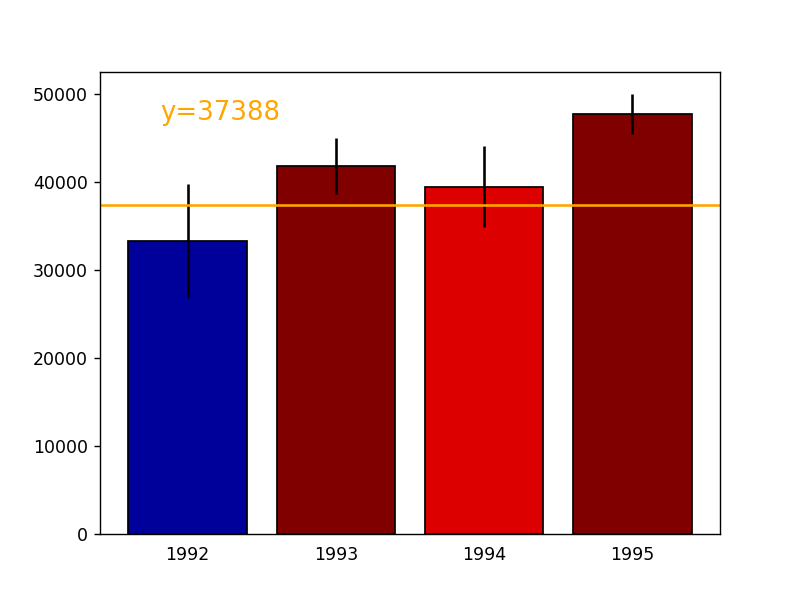

In [4]:
chart = InteractiveBarChart()